In [105]:
import pandas as pd
import numpy as np

In [106]:
df=pd.read_excel(r'D:\Documents\movie2_data.xlsx')

## 3.1数据重塑和轴向旋转

### (1)层次化索引

In [107]:
s=pd.Series(np.arange(1,10))
s

0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
dtype: int32

In [108]:
s1=np.arange(1,10)
s1

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [109]:
s=pd.Series(np.arange(1,10),index=[['a','a','a','b','b','c','c','d','d'],[1,2,3,1,2,3,1,2,3]])
s

a  1    1
   2    2
   3    3
b  1    4
   2    5
c  3    6
   1    7
d  2    8
   3    9
dtype: int32

In [110]:
s.index

MultiIndex(levels=[['a', 'b', 'c', 'd'], [1, 2, 3]],
           codes=[[0, 0, 0, 1, 1, 2, 2, 3, 3], [0, 1, 2, 0, 1, 2, 0, 1, 2]])

In [111]:
s['c']

3    6
1    7
dtype: int32

In [112]:
s['c'][1]

7

In [113]:
s['a':'c']

a  1    1
   2    2
   3    3
b  1    4
   2    5
c  3    6
   1    7
dtype: int32

In [114]:
s[:,1] #注意这个1是指内层的值

a    1
b    4
c    7
dtype: int32

In [115]:
s['c',3]

6

###  用unstack函数将一维series转成dataframe

In [116]:
s.unstack()

,1,2,3
a,1.0,2.0,3.0
b,4.0,5.0,NaN
c,7.0,NaN,6.0
d,NaN,8.0,9.0


In [117]:
s.unstack().stack()

a  1    1.0
   2    2.0
   3    3.0
b  1    4.0
   2    5.0
c  1    7.0
   3    6.0
d  2    8.0
   3    9.0
dtype: float64

In [118]:
np.arange(12).reshape(4,3)

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

### Dataframe的层次化索引

In [119]:
data=pd.DataFrame(np.arange(12).reshape(4,3))
data


,0,1,2
0,0,1,2
1,3,4,5
2,6,7,8
3,9,10,11


### 用行来进行层次化索引

In [120]:
data=pd.DataFrame(np.arange(12).reshape(4,3),index=[['a','a','b','b'],[1,2,1,2]])
data

0   1   2
a 1  0   1   2
  2  3   4   5
b 1  6   7   8
  2  9  10  11

### 列层次化索引

In [121]:
data=pd.DataFrame(np.arange(12).reshape(4,3),index=[['a','a','b','b'],[1,2,1,2]],columns=[['A','A','C'],['Z','X','C']])
data

A       C
     Z   X   C
a 1  0   1   2
  2  3   4   5
b 1  6   7   8
  2  9  10  11

In [122]:
data.shape

(4, 3)

In [123]:
data.ndim


2

In [124]:
data['A']

Z   X
a 1  0   1
  2  3   4
b 1  6   7
  2  9  10

In [125]:
data.index


MultiIndex(levels=[['a', 'b'], [1, 2]],
           codes=[[0, 0, 1, 1], [0, 1, 0, 1]])

In [126]:
data.index.names=['row1','row2']
data.columns.names=['col1','col2']
data

col1       A       C
col2       Z   X   C
row1 row2           
a    1     0   1   2
     2     3   4   5
b    1     6   7   8
     2     9  10  11

In [127]:
data.swaplevel('row1','row2')

col1       A       C
col2       Z   X   C
row2 row1           
1    a     0   1   2
2    a     3   4   5
1    b     6   7   8
2    b     9  10  11

In [128]:
data.swaplevel('col1','col2',axis=1)

col2       Z   X   C
col1       A   A   C
row1 row2           
a    1     0   1   2
     2     3   4   5
b    1     6   7   8
     2     9  10  11

In [129]:
data.loc['a']

col1  A     C
col2  Z  X  C
row2         
1     0  1  2
2     3  4  5

#### set_index 可以把列变成索引

In [130]:
df=pd.read_excel(r'D:\Documents\movie2_data.xlsx')

In [131]:
df=df.set_index(['产地','年代'])
df

名字    投票人数  \
产地   年代                                                                
美国   1994                                             肖申克的救赎  692795   
     1957                                               控方证人   42995   
意大利  1997                                              美丽人生   327855   
美国   1994                                               阿甘正传  580897   
中国大陆 1993                                               霸王别姬  478523   
美国   2012                                             泰坦尼克号   157074   
     1993                                             辛德勒的名单  306904   
日本   1997              新世纪福音战士剧场版：Air/真心为你 新世紀エヴァンゲリオン劇場版 Ai   24355   
     2013                     银魂完结篇：直到永远的万事屋 劇場版 銀魂 完結篇 万事屋よ   21513   
法国   1994                                           这个杀手不太冷   662552   
意大利  2003                                              灿烂人生    16807   
美国   2016                                              疯狂动物城  284652   
日本   2009                           福音战士新剧场版：破 ヱヴァンゲリヲン新劇場版：   32524   
美国   2009                                                海豚湾  159302   
日本   2008                                       回忆积木小屋 つみきのい   93384   
美国   2008                                            机器人总动员   421734   
     1957                                               十二怒汉  134949   
     2008                                            旅行到宇宙边缘   10044   
英国   2001                                                父与女   53358   
美国   2009                                            暴力云与送子鹳   75567   
     1931                                               城市之光   31105   
中国大陆 1961                                               大闹天宫   74881   
美国   2010                                               盗梦空间  642134   
法国   2004                                             放牛班的春天  370585   
意大利  1998                                              海上钢琴师  501153   
法国   2009                                                 家园   32717   
美国   1972                                                 教父  280871   
     1939                                               乱世佳人  226131   
日本   2001                                       千与千寻 千と千尋の神隠  525505   
中国大陆 2015                                               穹顶之下   51113   
...                                                      ...     ...   
美国   1991                                               跃马英雄      86   
     1990                                                 洛奇    3211   
英国   1990                                             孟菲斯美女号    1627   
     1990                                            末路英雄半世情     216   
美国   1990                                              活死人之夜    1326   
中国香港 1989                                   省港旗兵3：逃出香港 省港旗兵第    1399   
美国   1989                                               危险之至      85   
意大利  1989                                               拯救首相     111   
日本   1989                                                二二六     568   
波兰   2014                                               华沙谍战     719   
中国大陆 1989                                              地狱·天堂     171   
韩国   1989                                            达摩为何东渡？     291   
美国   1988                                                天伦乐      99   
西德   1988                        青春禁忌游戏 Дорогая Елена Сергее     118   
英国   1987                                             安迪·沃霍尔      40   
美国   1987                                               青春传奇     175   
     1987                                              我要求审判     102   
     1987                                              跷家的一夜      82   
中国台湾 1987                                         黑皮与白牙 黑皮與白     106   
美国   1987                                              零下的激情     199   
中国大陆 1986                                           T省的八四、八五     380   
美国   1986                                               离别秋波     240   
中国大陆 1986                                            失踪的女中学生     101   
     1986                 

#### 每一个索引都是一个元组

In [132]:
df.index[0]

('美国', 1994)

In [134]:
#df('美国',1994)

In [135]:
df.loc['美国']

,名字,投票人数,类型,上映时间,时长,评分,首映地点
年代,,,,,,,
1994,肖申克的救赎,692795,剧情/犯罪,1994-09-10 00:00:00,142,9.6,多伦多电影节
1957,控方证人,42995,剧情/悬疑/犯罪,1957-12-17 00:00:00,116,9.5,美国
1994,阿甘正传,580897,剧情/爱情,1994-06-23 00:00:00,142,9.4,洛杉矶首映
2012,泰坦尼克号,157074,剧情/爱情/灾难,2012-04-10 00:00:00,194,9.4,中国大陆
1993,辛德勒的名单,306904,剧情/历史/战争,1993-11-30 00:00:00,195,9.4,华盛顿首映
2016,疯狂动物城,284652,喜剧/动作/动画/冒险,2016-03-04 00:00:00,109,9.3,中国大陆/美国
2009,海豚湾,159302,纪录片,2009-07-31 00:00:00,92,9.3,美国
2008,机器人总动员,421734,喜剧/爱情/科幻/动画/冒险,2008-06-27 00:00:00,98,9.3,美国
1957,十二怒汉,134949,剧情,1957-04-01 00:00:00,96,9.3,美国


In [136]:
df.swaplevel('产地','年代')

,,名字,投票人数,类型,上映时间,时长,评分,首映地点
年代,产地,,,,,,,
1994,美国,肖申克的救赎,692795,剧情/犯罪,1994-09-10 00:00:00,142,9.6,多伦多电影节
1957,美国,控方证人,42995,剧情/悬疑/犯罪,1957-12-17 00:00:00,116,9.5,美国
1997,意大利,美丽人生,327855,剧情/喜剧/爱情,1997-12-20 00:00:00,116,9.5,意大利
1994,美国,阿甘正传,580897,剧情/爱情,1994-06-23 00:00:00,142,9.4,洛杉矶首映
1993,中国大陆,霸王别姬,478523,剧情/爱情/同性,1993-01-01 00:00:00,171,9.4,香港
2012,美国,泰坦尼克号,157074,剧情/爱情/灾难,2012-04-10 00:00:00,194,9.4,中国大陆
1993,美国,辛德勒的名单,306904,剧情/历史/战争,1993-11-30 00:00:00,195,9.4,华盛顿首映
1997,日本,新世纪福音战士剧场版：Air/真心为你 新世紀エヴァンゲリオン劇場版 Ai,24355,剧情/动作/科幻/动画/奇幻,1997-07-19 00:00:00,87,9.4,日本
2013,日本,银魂完结篇：直到永远的万事屋 劇場版 銀魂 完結篇 万事屋よ,21513,剧情/动画,2013-07-06 00:00:00,110,9.4,日本


#### 取消层次所引 reset_index（）

In [137]:
df=df.reset_index()

### 数据旋转

#### .T可以进行行列转换

In [138]:
data=df[:5]
data


,产地,年代,名字,投票人数,类型,上映时间,时长,评分,首映地点
0,美国,1994,肖申克的救赎,692795,剧情/犯罪,1994-09-10 00:00:00,142,9.6,多伦多电影节
1,美国,1957,控方证人,42995,剧情/悬疑/犯罪,1957-12-17 00:00:00,116,9.5,美国
2,意大利,1997,美丽人生,327855,剧情/喜剧/爱情,1997-12-20 00:00:00,116,9.5,意大利
3,美国,1994,阿甘正传,580897,剧情/爱情,1994-06-23 00:00:00,142,9.4,洛杉矶首映
4,中国大陆,1993,霸王别姬,478523,剧情/爱情/同性,1993-01-01 00:00:00,171,9.4,香港


In [139]:
data.T

,0,1,2,3,4
产地,美国,美国,意大利,美国,中国大陆
年代,1994,1957,1997,1994,1993
名字,肖申克的救赎,控方证人,美丽人生,阿甘正传,霸王别姬
投票人数,692795,42995,327855,580897,478523
类型,剧情/犯罪,剧情/悬疑/犯罪,剧情/喜剧/爱情,剧情/爱情,剧情/爱情/同性
上映时间,1994-09-10 00:00:00,1957-12-17 00:00:00,1997-12-20 00:00:00,1994-06-23 00:00:00,1993-01-01 00:00:00
时长,142,116,116,142,171
评分,9.6,9.5,9.5,9.4,9.4
首映地点,多伦多电影节,美国,意大利,洛杉矶首映,香港


In [140]:
data.T.T

,产地,年代,名字,投票人数,类型,上映时间,时长,评分,首映地点
0,美国,1994,肖申克的救赎,692795,剧情/犯罪,1994-09-10 00:00:00,142,9.6,多伦多电影节
1,美国,1957,控方证人,42995,剧情/悬疑/犯罪,1957-12-17 00:00:00,116,9.5,美国
2,意大利,1997,美丽人生,327855,剧情/喜剧/爱情,1997-12-20 00:00:00,116,9.5,意大利
3,美国,1994,阿甘正传,580897,剧情/爱情,1994-06-23 00:00:00,142,9.4,洛杉矶首映
4,中国大陆,1993,霸王别姬,478523,剧情/爱情/同性,1993-01-01 00:00:00,171,9.4,香港


#### dataFrame也可以使用stack和unstack转化为层次化索引的series

In [141]:
data.stack()

0  产地                       美国
   年代                     1994
   名字                   肖申克的救赎
   投票人数                 692795
   类型                    剧情/犯罪
   上映时间    1994-09-10 00:00:00
   时长                      142
   评分                      9.6
   首映地点                 多伦多电影节
1  产地                       美国
   年代                     1957
   名字                     控方证人
   投票人数                  42995
   类型                 剧情/悬疑/犯罪
   上映时间    1957-12-17 00:00:00
   时长                      116
   评分                      9.5
   首映地点                     美国
2  产地                      意大利
   年代                     1997
   名字                    美丽人生 
   投票人数                 327855
   类型                 剧情/喜剧/爱情
   上映时间    1997-12-20 00:00:00
   时长                      116
   评分                      9.5
   首映地点                    意大利
3  产地                       美国
   年代                     1994
   名字                     阿甘正传
   投票人数                 580897
   类型                    剧情/爱情
   上映时间 

In [142]:
data.stack().unstackack()

AttributeError: 'Series' object has no attribute 'unstackack'

## 3.2 数据分组，分组运算

#### GroupBy技术：实现数据的分组，和分组运算，作用类似于数据透视表
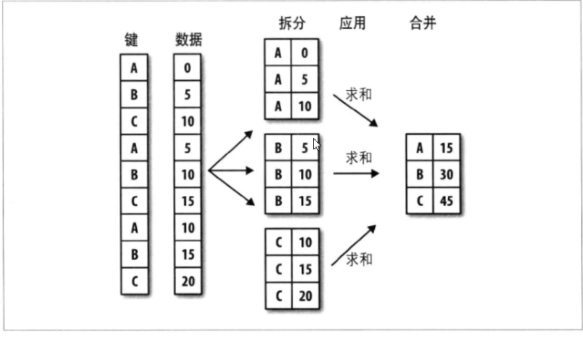

#### 按照电影产地进行分组

In [143]:
group=df.groupby(df['产地'])

#### 计算分组后的各个统计量

In [144]:
type(group)

pandas.core.groupby.generic.DataFrameGroupBy

In [145]:
group.mean()

,年代,投票人数,时长,评分
产地,,,,
中国台湾,1999.009709,8474.864078,87.257282,7.066667
中国大陆,2004.599684,10898.293793,81.432930,6.064703
中国香港,1991.100316,8167.446159,88.541214,6.474114
丹麦,1999.090909,1993.858586,88.101010,7.245960
其他,1998.743750,1590.686979,87.066667,7.237448
加拿大,2002.461964,1915.304288,80.109267,6.733610
印度,2005.974790,3210.843137,121.016807,6.872269
墨西哥,1992.815126,1173.218487,91.840336,7.087395
巴西,1999.871287,3536.000000,87.811881,7.262376


In [146]:
group.sum()

,年代,投票人数,时长,评分
产地,,,,
中国台湾,1235388,5237466,53925,4367.2
中国大陆,7621488,41435313,309608,23058.0
中国香港,5676627,23285389,252431,18457.7
丹麦,395820,394784,17444,1434.7
其他,3837588,3054119,167168,13895.9
加拿大,1447780,1384765,57919,4868.4
印度,716133,1146271,43203,2453.4
墨西哥,237145,139613,10929,843.4
巴西,201987,357136,8869,733.5


#### 计算每年的平均评分

In [147]:
df['评分'].groupby(df['年代']).mean()

年代
1888    7.950000
1890    4.800000
1892    7.500000
1894    6.633333
1895    7.575000
1896    7.037500
1897    6.633333
1898    7.450000
1899    6.900000
1900    7.228571
1901    7.250000
1902    7.483333
1903    6.968750
1904    7.212500
1905    6.820000
1906    7.342857
1907    7.020000
1908    7.150000
1909    7.560000
1910    6.940000
1911    7.375000
1912    7.920000
1913    6.862500
1914    6.473077
1915    7.260000
1916    7.758333
1917    7.075000
1918    7.200000
1919    7.490000
1920    7.492857
          ...   
1987    7.284548
1988    7.265729
1989    7.210687
1990    7.149109
1991    7.154634
1992    7.223678
1993    7.195692
1994    7.262348
1995    7.289366
1996    7.258801
1997    7.330168
1998    7.238302
1999    7.188000
2000    7.134063
2001    7.110145
2002    7.069778
2003    7.137750
2004    7.031366
2005    7.030008
2006    6.914719
2007    6.875102
2008    6.910647
2009    6.750000
2010    6.770361
2011    6.577010
2012    6.458374
2013    6.392604
2014    6.2

In [148]:
df1=df['评分'].groupby(df['年代'])

#### 统计只会对数值进行统计，由于年代也是数值变量，所以我们需要对其进转换


In [149]:
df['年代']=df['年代'].astype('str')

In [150]:
df.groupby('产地').mean()

,投票人数,时长,评分
产地,,,
中国台湾,8474.864078,87.257282,7.066667
中国大陆,10898.293793,81.432930,6.064703
中国香港,8167.446159,88.541214,6.474114
丹麦,1993.858586,88.101010,7.245960
其他,1590.686979,87.066667,7.237448
加拿大,1915.304288,80.109267,6.733610
印度,3210.843137,121.016807,6.872269
墨西哥,1173.218487,91.840336,7.087395
巴西,3536.000000,87.811881,7.262376


In [151]:
df.groupby('产地').median()

,投票人数,时长,评分
产地,,,
中国台湾,487.0,92.0,7.1
中国大陆,501.5,90.0,6.4
中国香港,637.0,92.0,6.5
丹麦,181.5,93.5,7.3
其他,154.0,90.0,7.4
加拿大,251.0,89.0,6.9
印度,138.0,131.0,7.0
墨西哥,174.0,93.0,7.2
巴西,126.0,96.0,7.3


#### 多个变量进行分组

In [152]:
df.groupby([df['产地'],df['年代']]).mean()

投票人数          时长        评分
产地   年代                                      
中国台湾 1963    121.000000  113.000000  6.400000
     1965    153.666667  105.000000  6.800000
     1966     51.000000   60.000000  7.900000
     1967   4444.000000  112.000000  8.000000
     1968     89.000000   83.000000  7.400000
     1969     91.000000   86.333333  7.400000
     1970    992.166667  108.666667  7.266667
     1971     51.000000  102.666667  6.933333
     1972    338.000000   90.500000  7.500000
     1973    980.600000  101.600000  7.280000
     1974    116.428571   98.857143  6.771429
     1975    246.000000   82.111111  6.611111
     1976    289.909091   74.363636  6.336364
     1977    220.125000   83.250000  6.525000
     1978    261.800000   75.800000  6.800000
     1979    492.937500   88.000000  6.956250
     1980    244.444444   84.333333  7.222222
     1981    414.300000   81.700000  7.140000
     1982    885.571429   86.714286  6.942857
     1983   2291.900000  100.100000  7.750000
     1984    955.800000   91.000000  7.410000
     1985   2601.000000   82.285714  7.314286
     1986   1148.000000   79.181818  7.418182
     1987   4032.750000   92.125000  7.550000
     1988   3576.222222   75.666667  6.877778
     1989   5792.428571   93.428571  7.857143
     1990   1476.857143   94.285714  6.900000
     1991  24040.400000  113.400000  7.100000
     1992   4683.250000   99.875000  7.600000
     1993  21047.600000  106.800000  6.840000
...                 ...         ...       ...
韩国   1986    109.000000   60.000000  6.600000
     1987    387.000000   90.000000  5.700000
     1989    203.000000  149.500000  7.950000
     1990     66.000000  132.500000  7.350000
     1991    140.500000   60.000000  6.100000
     1992    112.500000  114.000000  6.850000
     1993    267.600000  111.800000  7.460000
     1994     65.000000  111.666667  6.666667
     1995    330.250000   91.000000  6.600000
     1996    512.428571   97.285714  6.985714
     1997    789.071429   99.071429  6.778571
     1998   3921.411765   95.588235  6.852941
     1999   2329.260870   94.478261  6.834783
     2000   4688.400000   94.433333  6.383333
     2001  10745.363636   99.484848  6.709091
     2002   5189.895833  102.145833  6.641667
     2003  15509.218182   98.763636  6.814545
     2004   9514.093750  102.750000  6.814062
     2005   6427.630137   98.493151  6.830137
     2006   7454.670455  103.284091  6.737500
     2007   3769.526316  101.013158  6.625000
     2008   6738.689189  100.648649  6.731081
     2009   4688.767123   96.863014  6.505479
     2010   8615.433333   99.344444  6.473333
     2011   8949.400000  100.011111  6.365556
     2012   5762.537736  100.669811  6.064151
     2013  10189.036036   96.504505  6.098198
     2014   3776.266667   98.666667  5.650833
     2015   3209.247706  100.266055  5.423853
     2016   1739.850000  106.100000  5.730000

[1535 rows x 3 columns]

#### 获得每个地区，每一年的电影的评分的均值

In [ ]:
a=df['评分'].groupby([df['产地'],df['年代']]).mean()
a

In [ ]:
a.unstack()

In [ ]:
a.unstack().T

## 离散化处理

#### eg:在实际数据分析项目中，对有的数据属性，我们只关注其区间或者等级
#### 例如，我们可以把评分在9以及评为A，7到9定义为B，3到5分定义为D，小于3定义为E

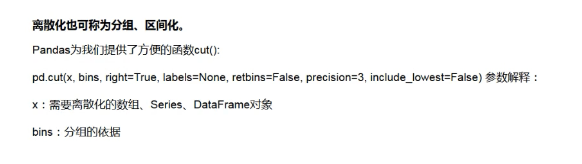right表示是否包括右端点，include_lowest是否包括做短点（想象成一个区间），lables是否用lable来定义输出。

In [153]:
df

,产地,年代,名字,投票人数,类型,上映时间,时长,评分,首映地点
0,美国,1994,肖申克的救赎,692795,剧情/犯罪,1994-09-10 00:00:00,142,9.6,多伦多电影节
1,美国,1957,控方证人,42995,剧情/悬疑/犯罪,1957-12-17 00:00:00,116,9.5,美国
2,意大利,1997,美丽人生,327855,剧情/喜剧/爱情,1997-12-20 00:00:00,116,9.5,意大利
3,美国,1994,阿甘正传,580897,剧情/爱情,1994-06-23 00:00:00,142,9.4,洛杉矶首映
4,中国大陆,1993,霸王别姬,478523,剧情/爱情/同性,1993-01-01 00:00:00,171,9.4,香港
5,美国,2012,泰坦尼克号,157074,剧情/爱情/灾难,2012-04-10 00:00:00,194,9.4,中国大陆
6,美国,1993,辛德勒的名单,306904,剧情/历史/战争,1993-11-30 00:00:00,195,9.4,华盛顿首映
7,日本,1997,新世纪福音战士剧场版：Air/真心为你 新世紀エヴァンゲリオン劇場版 Ai,24355,剧情/动作/科幻/动画/奇幻,1997-07-19 00:00:00,87,9.4,日本
8,日本,2013,银魂完结篇：直到永远的万事屋 劇場版 銀魂 完結篇 万事屋よ,21513,剧情/动画,2013-07-06 00:00:00,110,9.4,日本
9,法国,1994,这个杀手不太冷,662552,剧情/动作/犯罪,1994-09-14 00:00:00,133,9.4,法国


In [154]:
pd.cut(df['评分'],[0,3,5,7,9,10])#划为为[0,3),[3,5),[5,7),[7,9),[9,10)一个半闭区间

0        (9, 10]
1        (9, 10]
2        (9, 10]
3        (9, 10]
4        (9, 10]
5        (9, 10]
6        (9, 10]
7        (9, 10]
8        (9, 10]
9        (9, 10]
10       (9, 10]
11       (9, 10]
12       (9, 10]
13       (9, 10]
14       (9, 10]
15       (9, 10]
16       (9, 10]
17       (9, 10]
18       (9, 10]
19       (9, 10]
20       (9, 10]
21       (9, 10]
22       (9, 10]
23       (9, 10]
24       (9, 10]
25       (9, 10]
26       (9, 10]
27       (9, 10]
28       (9, 10]
29       (9, 10]
          ...   
38699     (7, 9]
38700     (7, 9]
38701     (7, 9]
38702     (7, 9]
38703     (5, 7]
38704     (5, 7]
38705     (7, 9]
38706     (7, 9]
38707     (5, 7]
38708     (5, 7]
38709     (5, 7]
38710     (7, 9]
38711     (7, 9]
38712    (9, 10]
38713     (7, 9]
38714     (7, 9]
38715     (7, 9]
38716     (7, 9]
38717     (7, 9]
38718     (7, 9]
38719     (7, 9]
38720     (7, 9]
38721     (7, 9]
38722     (7, 9]
38723     (7, 9]
38724     (7, 9]
38725     (7, 9]
38726     (7, 

In [155]:
pd.cut(df['评分'],[0,3,5,7,9,10],labels=['E','D','C','B','A'])

0        A
1        A
2        A
3        A
4        A
5        A
6        A
7        A
8        A
9        A
10       A
11       A
12       A
13       A
14       A
15       A
16       A
17       A
18       A
19       A
20       A
21       A
22       A
23       A
24       A
25       A
26       A
27       A
28       A
29       A
        ..
38699    B
38700    B
38701    B
38702    B
38703    C
38704    C
38705    B
38706    B
38707    C
38708    C
38709    C
38710    B
38711    B
38712    A
38713    B
38714    B
38715    B
38716    B
38717    B
38718    B
38719    B
38720    B
38721    B
38722    B
38723    B
38724    B
38725    B
38726    B
38727    B
38728    C
Name: 评分, Length: 38729, dtype: category
Categories (5, object): [E < D < C < B < A]

In [156]:
df['评分等级']=pd.cut(df['评分'],[0,3,5,7,9,10],labels=['E','D','C','B','A'])
df

,产地,年代,名字,投票人数,类型,上映时间,时长,评分,首映地点,评分等级
0,美国,1994,肖申克的救赎,692795,剧情/犯罪,1994-09-10 00:00:00,142,9.6,多伦多电影节,A
1,美国,1957,控方证人,42995,剧情/悬疑/犯罪,1957-12-17 00:00:00,116,9.5,美国,A
2,意大利,1997,美丽人生,327855,剧情/喜剧/爱情,1997-12-20 00:00:00,116,9.5,意大利,A
3,美国,1994,阿甘正传,580897,剧情/爱情,1994-06-23 00:00:00,142,9.4,洛杉矶首映,A
4,中国大陆,1993,霸王别姬,478523,剧情/爱情/同性,1993-01-01 00:00:00,171,9.4,香港,A
5,美国,2012,泰坦尼克号,157074,剧情/爱情/灾难,2012-04-10 00:00:00,194,9.4,中国大陆,A
6,美国,1993,辛德勒的名单,306904,剧情/历史/战争,1993-11-30 00:00:00,195,9.4,华盛顿首映,A
7,日本,1997,新世纪福音战士剧场版：Air/真心为你 新世紀エヴァンゲリオン劇場版 Ai,24355,剧情/动作/科幻/动画/奇幻,1997-07-19 00:00:00,87,9.4,日本,A
8,日本,2013,银魂完结篇：直到永远的万事屋 劇場版 銀魂 完結篇 万事屋よ,21513,剧情/动画,2013-07-06 00:00:00,110,9.4,日本,A
9,法国,1994,这个杀手不太冷,662552,剧情/动作/犯罪,1994-09-14 00:00:00,133,9.4,法国,A


In [157]:
bins=np.percentile(df['投票人数'],[0,20,40,50,80,100])#将投票人数分为5个等级

In [158]:
df['热门程度']=pd.cut(df['投票人数'],bins,labels=['E','D','C','B','A'])

In [159]:
df[:5]

,产地,年代,名字,投票人数,类型,上映时间,时长,评分,首映地点,评分等级,热门程度
0,美国,1994,肖申克的救赎,692795,剧情/犯罪,1994-09-10 00:00:00,142,9.6,多伦多电影节,A,A
1,美国,1957,控方证人,42995,剧情/悬疑/犯罪,1957-12-17 00:00:00,116,9.5,美国,A,A
2,意大利,1997,美丽人生,327855,剧情/喜剧/爱情,1997-12-20 00:00:00,116,9.5,意大利,A,A
3,美国,1994,阿甘正传,580897,剧情/爱情,1994-06-23 00:00:00,142,9.4,洛杉矶首映,A,A
4,中国大陆,1993,霸王别姬,478523,剧情/爱情/同性,1993-01-01 00:00:00,171,9.4,香港,A,A


#### 处理后我们可以进行数据的筛选，比如投票多但是评分很低

In [160]:
df[(df.评分等级=='E')&(df.热门程度=='A')]

,产地,年代,名字,投票人数,类型,上映时间,时长,评分,首映地点,评分等级,热门程度
655,中国大陆,2011,B区,5187,剧情/惊悚/恐怖,2011-06-03 00:00:00,89,2.3,中国大陆,E,A
4376,中国大陆,2014,怖偶,4867,悬疑/惊悚,2014-05-07 00:00:00,88,2.8,中国大陆,E,A
5413,中国大陆,2011,床下有人,4309,悬疑/惊悚,2011-10-14 00:00:00,100,2.8,中国大陆,E,A
6802,中国大陆,2013,帝国秘符,4351,动作/冒险,2013-09-18 00:00:00,93,3.0,中国大陆,E,A
8232,中国大陆,2011,飞天,4764,剧情,2011-07-01 00:00:00,115,2.9,中国大陆,E,A
8406,中国大陆,2014,分手达人,3937,喜剧/爱情,2014-06-06 00:00:00,90,2.7,中国大陆,E,A
9601,中国大陆,2012,孤岛惊魂,2982,悬疑/惊悚/恐怖,2013-01-26 00:00:00,93,2.8,中国大陆,E,A
10513,中国大陆,2013,海天盛宴·韦口,3788,情色,2013-10-12 00:00:00,88,2.9,网络,E,A
16799,中国大陆,2013,孪生密码,6390,动作/悬疑,2013-11-08 00:00:00,96,2.9,中国大陆,E,A
21533,日本,2010,拳皇,6329,动作/科幻/冒险,2012-10-12 00:00:00,93,3.0,中国大陆,E,A


In [161]:
df.to_excel(r'D:\Documents\movie3_data.xlsx')

## 3.4 合并数据集

In [162]:
df_usa=df[df.产地=='美国']
df_usa

,产地,年代,名字,投票人数,类型,上映时间,时长,评分,首映地点,评分等级,热门程度
0,美国,1994,肖申克的救赎,692795,剧情/犯罪,1994-09-10 00:00:00,142,9.6,多伦多电影节,A,A
1,美国,1957,控方证人,42995,剧情/悬疑/犯罪,1957-12-17 00:00:00,116,9.5,美国,A,A
3,美国,1994,阿甘正传,580897,剧情/爱情,1994-06-23 00:00:00,142,9.4,洛杉矶首映,A,A
5,美国,2012,泰坦尼克号,157074,剧情/爱情/灾难,2012-04-10 00:00:00,194,9.4,中国大陆,A,A
6,美国,1993,辛德勒的名单,306904,剧情/历史/战争,1993-11-30 00:00:00,195,9.4,华盛顿首映,A,A
11,美国,2016,疯狂动物城,284652,喜剧/动作/动画/冒险,2016-03-04 00:00:00,109,9.3,中国大陆/美国,A,A
13,美国,2009,海豚湾,159302,纪录片,2009-07-31 00:00:00,92,9.3,美国,A,A
15,美国,2008,机器人总动员,421734,喜剧/爱情/科幻/动画/冒险,2008-06-27 00:00:00,98,9.3,美国,A,A
16,美国,1957,十二怒汉,134949,剧情,1957-04-01 00:00:00,96,9.3,美国,A,A
17,美国,2008,旅行到宇宙边缘,10044,纪录片,2008-11-07 00:00:00,90,9.3,美国,A,A


In [163]:
df_China=df[df.产地=='中国大陆']

In [164]:
df_usa

,产地,年代,名字,投票人数,类型,上映时间,时长,评分,首映地点,评分等级,热门程度
0,美国,1994,肖申克的救赎,692795,剧情/犯罪,1994-09-10 00:00:00,142,9.6,多伦多电影节,A,A
1,美国,1957,控方证人,42995,剧情/悬疑/犯罪,1957-12-17 00:00:00,116,9.5,美国,A,A
3,美国,1994,阿甘正传,580897,剧情/爱情,1994-06-23 00:00:00,142,9.4,洛杉矶首映,A,A
5,美国,2012,泰坦尼克号,157074,剧情/爱情/灾难,2012-04-10 00:00:00,194,9.4,中国大陆,A,A
6,美国,1993,辛德勒的名单,306904,剧情/历史/战争,1993-11-30 00:00:00,195,9.4,华盛顿首映,A,A
11,美国,2016,疯狂动物城,284652,喜剧/动作/动画/冒险,2016-03-04 00:00:00,109,9.3,中国大陆/美国,A,A
13,美国,2009,海豚湾,159302,纪录片,2009-07-31 00:00:00,92,9.3,美国,A,A
15,美国,2008,机器人总动员,421734,喜剧/爱情/科幻/动画/冒险,2008-06-27 00:00:00,98,9.3,美国,A,A
16,美国,1957,十二怒汉,134949,剧情,1957-04-01 00:00:00,96,9.3,美国,A,A
17,美国,2008,旅行到宇宙边缘,10044,纪录片,2008-11-07 00:00:00,90,9.3,美国,A,A


In [165]:
df_China.append(df_usa)

,产地,年代,名字,投票人数,类型,上映时间,时长,评分,首映地点,评分等级,热门程度
4,中国大陆,1993,霸王别姬,478523,剧情/爱情/同性,1993-01-01 00:00:00,171,9.4,香港,A,A
21,中国大陆,1961,大闹天宫,74881,动画/奇幻,1905-05-14 00:00:00,114,9.2,上集,A,A
29,中国大陆,2015,穹顶之下,51113,纪录片,2015-02-28 00:00:00,104,9.2,中国大陆,A,A
38,中国大陆,1982,茶馆,10678,剧情/历史,1905-06-04 00:00:00,118,9.2,美国,A,A
45,中国大陆,1988,山水情,10781,动画/短片,1905-06-10 00:00:00,19,9.2,美国,A,A
49,中国大陆,2016,“人权卫士”的人权纪录,109,纪录片,2016-03-13 00:00:00,45,5.6,中国大陆,C,D
62,中国大陆,2014,0.5,2825,爱情,2014-09-12 00:00:00,85,4.4,中国大陆,D,A
67,中国大陆,2000,鬼子来了,180738,剧情/战争,2000-05-12 00:00:00,139,9.1,戛纳电影节,A,A
119,中国大陆,2008,11度青春之《李雷和韩梅,9583,短片,2010-10-21 00:00:00,60,5.7,美国,C,A
132,中国大陆,1992,12只蚊子和,1231,动画/短片,1905-06-14 00:00:00,6,8.3,美国,B,B


### merge函数

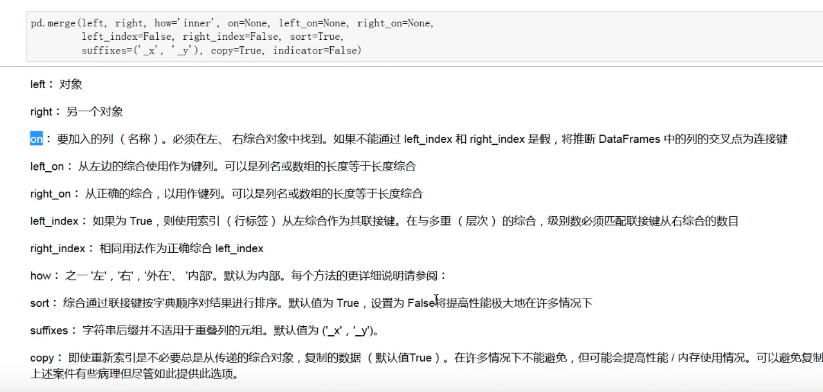

In [166]:
df1=df.loc[:5]
df1

,产地,年代,名字,投票人数,类型,上映时间,时长,评分,首映地点,评分等级,热门程度
0,美国,1994,肖申克的救赎,692795,剧情/犯罪,1994-09-10 00:00:00,142,9.6,多伦多电影节,A,A
1,美国,1957,控方证人,42995,剧情/悬疑/犯罪,1957-12-17 00:00:00,116,9.5,美国,A,A
2,意大利,1997,美丽人生,327855,剧情/喜剧/爱情,1997-12-20 00:00:00,116,9.5,意大利,A,A
3,美国,1994,阿甘正传,580897,剧情/爱情,1994-06-23 00:00:00,142,9.4,洛杉矶首映,A,A
4,中国大陆,1993,霸王别姬,478523,剧情/爱情/同性,1993-01-01 00:00:00,171,9.4,香港,A,A
5,美国,2012,泰坦尼克号,157074,剧情/爱情/灾难,2012-04-10 00:00:00,194,9.4,中国大陆,A,A


In [167]:
df2=df.loc[:5][['名字','产地']]
df2

,名字,产地
0,肖申克的救赎,美国
1,控方证人,美国
2,美丽人生,意大利
3,阿甘正传,美国
4,霸王别姬,中国大陆
5,泰坦尼克号,美国


In [168]:
df2['票房']=[123344,23454,5556,333,6666,444]
df2

,名字,产地,票房
0,肖申克的救赎,美国,123344
1,控方证人,美国,23454
2,美丽人生,意大利,5556
3,阿甘正传,美国,333
4,霸王别姬,中国大陆,6666
5,泰坦尼克号,美国,444


In [169]:
df2=df2.sample(frac=1) #将数据进行打乱
df2

,名字,产地,票房
2,美丽人生,意大利,5556
0,肖申克的救赎,美国,123344
3,阿甘正传,美国,333
1,控方证人,美国,23454
4,霸王别姬,中国大陆,6666
5,泰坦尼克号,美国,444


In [170]:
df2.index=range(len(df2))

In [171]:
df2

,名字,产地,票房
0,美丽人生,意大利,5556
1,肖申克的救赎,美国,123344
2,阿甘正传,美国,333
3,控方证人,美国,23454
4,霸王别姬,中国大陆,6666
5,泰坦尼克号,美国,444


In [172]:
pd.merge(df1,df2,how='inner',on='名字') #如果选择合并的条件不一样就需要left_on和right_on来进行选择

,产地_x,年代,名字,投票人数,类型,上映时间,时长,评分,首映地点,评分等级,热门程度,产地_y,票房
0,美国,1994,肖申克的救赎,692795,剧情/犯罪,1994-09-10 00:00:00,142,9.6,多伦多电影节,A,A,美国,123344
1,美国,1957,控方证人,42995,剧情/悬疑/犯罪,1957-12-17 00:00:00,116,9.5,美国,A,A,美国,23454
2,意大利,1997,美丽人生,327855,剧情/喜剧/爱情,1997-12-20 00:00:00,116,9.5,意大利,A,A,意大利,5556
3,美国,1994,阿甘正传,580897,剧情/爱情,1994-06-23 00:00:00,142,9.4,洛杉矶首映,A,A,美国,333
4,中国大陆,1993,霸王别姬,478523,剧情/爱情/同性,1993-01-01 00:00:00,171,9.4,香港,A,A,中国大陆,6666
5,美国,2012,泰坦尼克号,157074,剧情/爱情/灾难,2012-04-10 00:00:00,194,9.4,中国大陆,A,A,美国,444


### contact：将多个数据集进行合并

In [173]:
df1=df[:10]
df2=df[100:110]
df3=df[200:210]

In [174]:
dff=pd.concat([df1,df2,df3])#默认axis=0 按行来增加，如果要按列来增加就需要设定axis=1
dff

,产地,年代,名字,投票人数,类型,上映时间,时长,评分,首映地点,评分等级,热门程度
0,美国,1994,肖申克的救赎,692795,剧情/犯罪,1994-09-10 00:00:00,142,9.6,多伦多电影节,A,A
1,美国,1957,控方证人,42995,剧情/悬疑/犯罪,1957-12-17 00:00:00,116,9.5,美国,A,A
2,意大利,1997,美丽人生,327855,剧情/喜剧/爱情,1997-12-20 00:00:00,116,9.5,意大利,A,A
3,美国,1994,阿甘正传,580897,剧情/爱情,1994-06-23 00:00:00,142,9.4,洛杉矶首映,A,A
4,中国大陆,1993,霸王别姬,478523,剧情/爱情/同性,1993-01-01 00:00:00,171,9.4,香港,A,A
5,美国,2012,泰坦尼克号,157074,剧情/爱情/灾难,2012-04-10 00:00:00,194,9.4,中国大陆,A,A
6,美国,1993,辛德勒的名单,306904,剧情/历史/战争,1993-11-30 00:00:00,195,9.4,华盛顿首映,A,A
7,日本,1997,新世纪福音战士剧场版：Air/真心为你 新世紀エヴァンゲリオン劇場版 Ai,24355,剧情/动作/科幻/动画/奇幻,1997-07-19 00:00:00,87,9.4,日本,A,A
8,日本,2013,银魂完结篇：直到永远的万事屋 劇場版 銀魂 完結篇 万事屋よ,21513,剧情/动画,2013-07-06 00:00:00,110,9.4,日本,A,A
9,法国,1994,这个杀手不太冷,662552,剧情/动作/犯罪,1994-09-14 00:00:00,133,9.4,法国,A,A
